In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회기분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델

# Tree
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
# 데이터 불러오기 (대출면
df_a = pd.read_csv('/home/piai/바탕화면/보험/DataSet_대출.csv', encoding='euc-kr')
df_a.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT
0,1,0,1,0,0,0,9001,9001,9001,0,1,0,2,13,3,420001
1,2,0,1,0,0,0,24001,0,24001,0,0,0,2,121,0,0
2,3,0,0,1,3,2,15001,9001,0,3001,1,25,4,121,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,1,25,4,61,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,1,0,1,97,0,0


In [3]:
# 데이터 불러오기 (보험)
df_b = pd.read_csv('/home/piai/바탕화면/보험/DataSet_보험.csv', encoding='euc-kr')
df_b.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX
0,1,공무원,5400,7700,4,1,24.0,주부,0,0,...,20000000,20000000,0,0,10,0,0,0,50,1
1,2,자영업,5500,8100,4,2,29.0,주부,0,0,...,7000000,36000000,0,0,0,300000,2,5,50,1
2,3,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,...,11000000,11000000,0,0,0,0,0,2,60,2
3,4,학생,0,10100,2,1,0.0,NaN,0,0,...,4000000,4000000,0,0,0,0,0,1,35,1
4,5,공무원,4800,4800,4,1,14.0,주부,0,0,...,4000000,4000000,0,0,0,500000,2,1,45,1


In [4]:
# 데이터 병합
df_merge = pd.merge(df_a, df_b, on='CUST_ID')

In [5]:
# 병합 후 컬럼명 확인
df_merge.columns

Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT',
       'CTCD_OCCR_MDIF', 'CB_GUIF_CNT', 'CB_GUIF_AMT', 'OCCP_NAME_G',
       'CUST_JOB_INCM', 'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM',
       'LAST_CHLD_AGE', 'MATE_OCCP_NAME_G', 'MATE_JOB_INCM', 'CRDT_LOAN_CNT',
       'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'CRLN_OVDU_RATE',
       'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE', 'STRT_CRDT_GRAD',
       'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE', 'AVG_STLN_RATE',
       'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'GDINS_MON_PREM',
       'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM',
       'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'CNTT_LAMT_CNT',
       'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_CLAM_CNT',
       'FMLY_PLPY_CNT', 'AGE', 'SEX'],
      d

In [6]:
# 정보 확인
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100233 entries, 0 to 100232
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CUST_ID            100233 non-null  int64  
 1   TARGET             100233 non-null  int64  
 2   BNK_LNIF_CNT       100233 non-null  int64  
 3   CPT_LNIF_CNT       100233 non-null  int64  
 4   SPART_LNIF_CNT     100233 non-null  int64  
 5   ECT_LNIF_CNT       100233 non-null  int64  
 6   TOT_LNIF_AMT       100233 non-null  int64  
 7   TOT_CLIF_AMT       100233 non-null  int64  
 8   BNK_LNIF_AMT       100233 non-null  int64  
 9   CPT_LNIF_AMT       100233 non-null  int64  
 10  CRDT_OCCR_MDIF     100233 non-null  int64  
 11  SPTCT_OCCR_MDIF    100233 non-null  int64  
 12  CRDT_CARD_CNT      100233 non-null  int64  
 13  CTCD_OCCR_MDIF     100233 non-null  int64  
 14  CB_GUIF_CNT        100233 non-null  int64  
 15  CB_GUIF_AMT        100233 non-null  int64  
 16  OC

In [7]:
# 결측치 확인
df_merge.isnull().sum()

CUST_ID                  0
TARGET                   0
BNK_LNIF_CNT             0
CPT_LNIF_CNT             0
SPART_LNIF_CNT           0
ECT_LNIF_CNT             0
TOT_LNIF_AMT             0
TOT_CLIF_AMT             0
BNK_LNIF_AMT             0
CPT_LNIF_AMT             0
CRDT_OCCR_MDIF           0
SPTCT_OCCR_MDIF          0
CRDT_CARD_CNT            0
CTCD_OCCR_MDIF           0
CB_GUIF_CNT              0
CB_GUIF_AMT              0
OCCP_NAME_G            464
CUST_JOB_INCM            0
HSHD_INFR_INCM           0
ACTL_FMLY_NUM            0
CUST_FMLY_NUM            0
LAST_CHLD_AGE         1027
MATE_OCCP_NAME_G     45709
MATE_JOB_INCM            0
CRDT_LOAN_CNT            0
MIN_CNTT_DATE            0
TOT_CRLN_AMT             0
TOT_REPY_AMT             0
CRLN_OVDU_RATE           0
CRLN_30OVDU_RATE         0
LT1Y_CLOD_RATE           0
STRT_CRDT_GRAD           0
LTST_CRDT_GRAD           0
PREM_OVDU_RATE           0
LT1Y_PEOD_RATE           0
AVG_STLN_RATE            0
STLN_REMN_AMT            0
L

OCCP_NAME_G            464 (직업)
LAST_CHLD_AGE         1027 (막내 나이)
MATE_OCCP_NAME_G     45709 (배우자 직업)

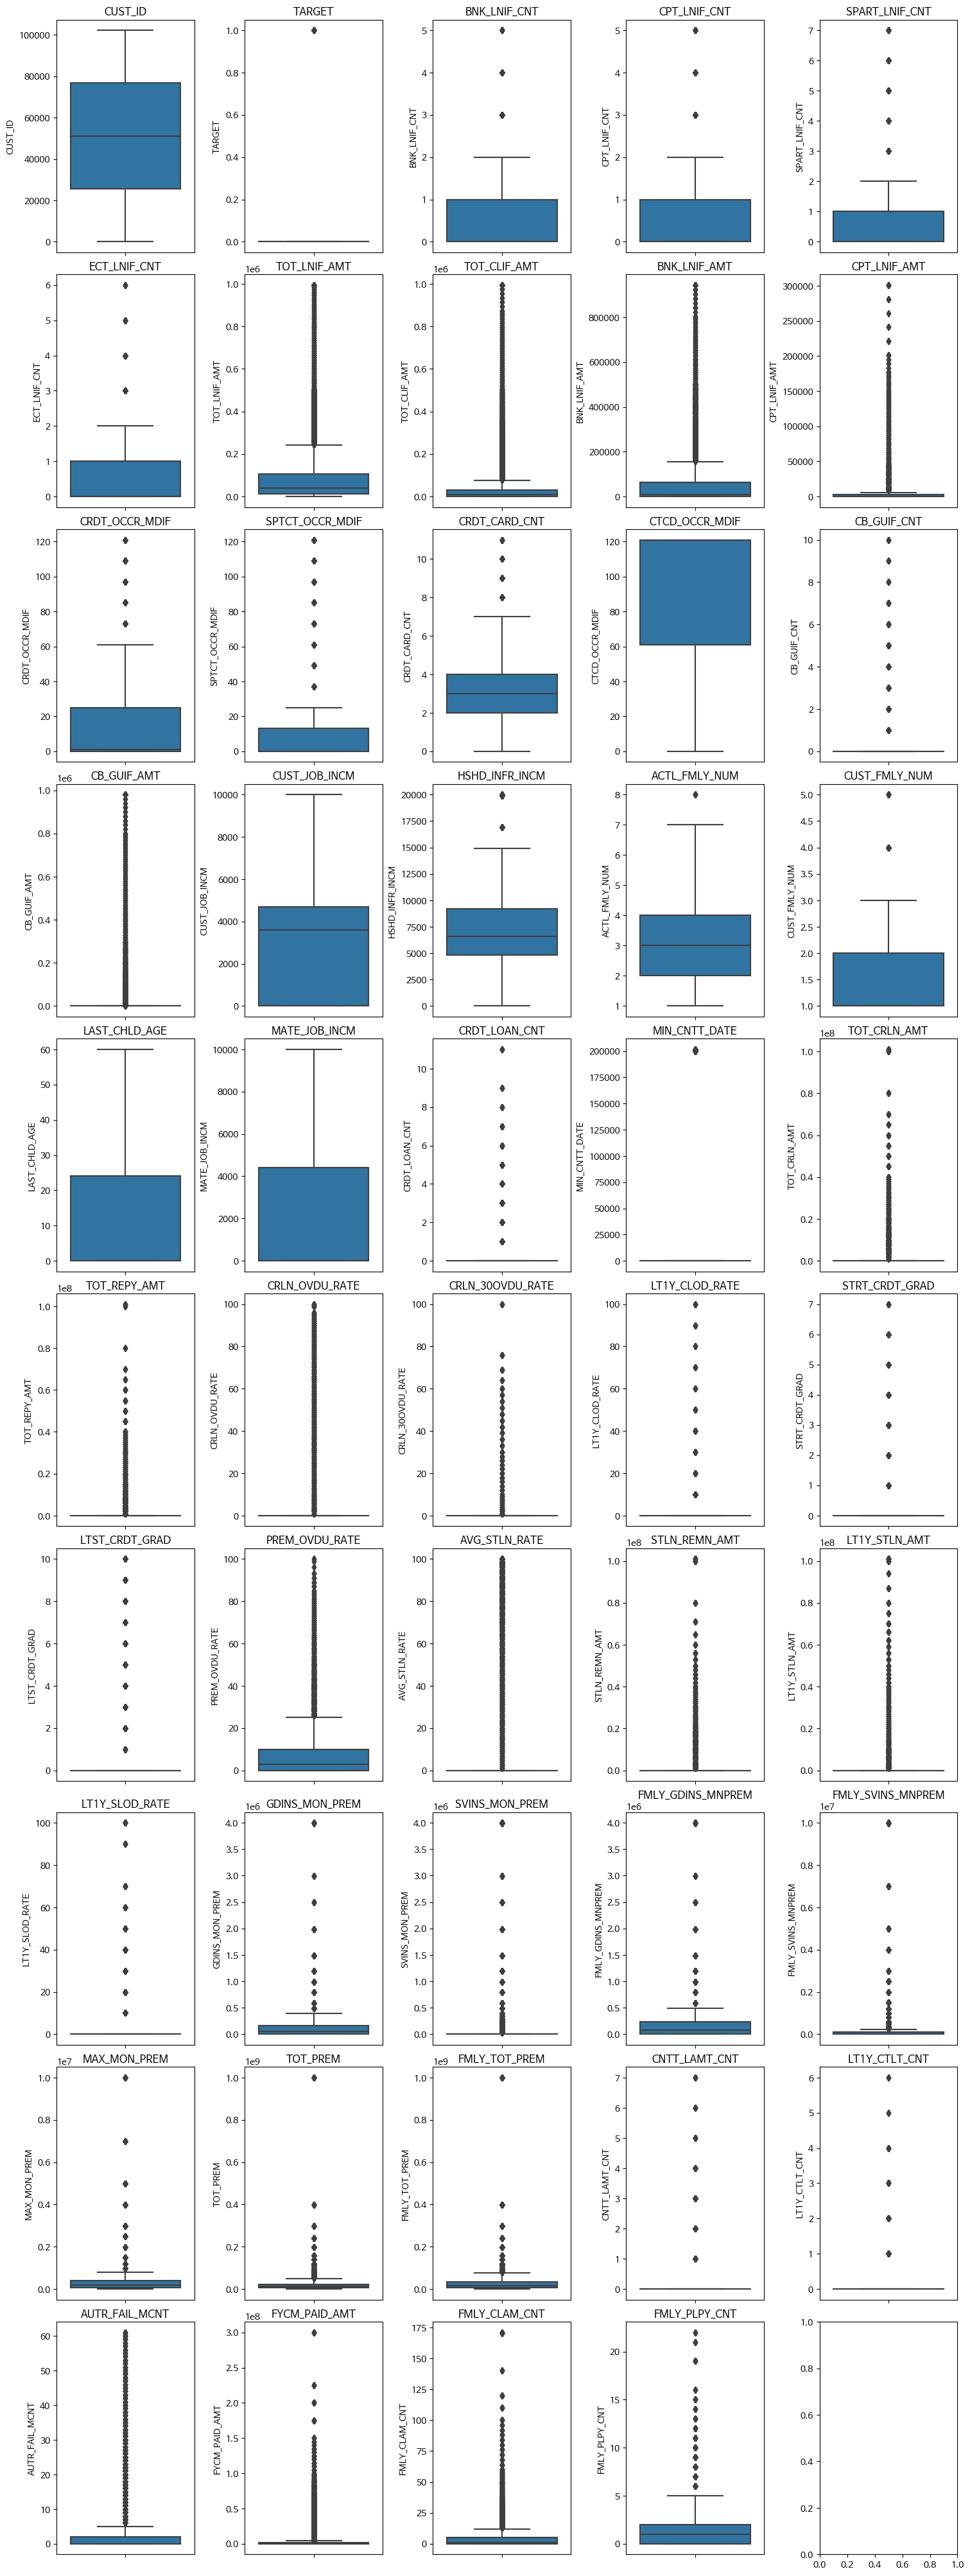

In [9]:
# 수치형 데이터 박스플롯으로 이상치 확인


# 데이터프레임 df_merge에서 이상치를 확인하고 싶은 숫자형 변수들을 선택
numeric_columns = df_merge.select_dtypes(include=['int64', 'float64']).columns

# 서브플롯 설정
fig, axes = plt.subplots(nrows=len(numeric_columns)//5 + 1, ncols=5, figsize=(15, 40), constrained_layout=True)

# 서브플롯에 박스플롯 그리기
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_merge[col], ax=axes[i//5, i%5])  # 여기서 y=df_merge[col]로 수정
    axes[i//5, i%5].set_title(col)

plt.show()



* 그래프로 확인 불가
* 분석 진행하면서 이상한값들 처리하기로 결정

## 결측치 및 이상치

* OCCP_NAME_G            464 (직업)
* LAST_CHLD_AGE         1027 (막내 나이)
* MATE_OCCP_NAME_G     45709 (배우자 직업)

#### OCCP_NAME_G(직업) 결측치, 이상치 처리

In [10]:
df_merge['OCCP_NAME_G'].fillna('무응답', inplace=True)

In [11]:
df_merge['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
무응답           464
Name: OCCP_NAME_G, dtype: int64

In [13]:
df_merge['OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [14]:
df_merge['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
무응답          1653
고소득 전문직      1223
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

* OCCP_NAME_G(직업) 결측치를 '무응답'처리
* '*'값을 '무응답' 처리

#### MATE_OCCP_NAME_G(배우자 직업) 결측치, 이상치 처리

In [15]:
# 'MATE_JOB_INCM' 열이 0이 아니고 'MATE_OCCP_NAME_G' 열이 결측치인 행 선택
mask = (df_merge['MATE_JOB_INCM'] != 0) & (df_merge['MATE_OCCP_NAME_G'].isnull())

# 선택된 행의 'MATE_OCCP_NAME_G' 열을 '무응답'으로 채우기
df_merge.loc[mask, 'MATE_OCCP_NAME_G'] = '무응답'

# 나머지 'MATE_OCCP_NAME_G' 열의 결측치를 '배우자 없음'으로 채우기
df_merge['MATE_OCCP_NAME_G'].fillna('배우자 없음', inplace=True)

In [16]:
df_merge['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
단순 사무직       1316
*            1027
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
무응답           360
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

* 결측치 중 360개를 무응답 처리

In [17]:
df_merge['MATE_OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [18]:
df_merge['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
무응답          1387
단순 사무직       1316
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

* '*'값을 '무응답' 처리

#### LAST_CHLD_AGE(막내나이) 결측값

In [19]:
# 결측값을 KNN보간법으로 처리하기 위하여 변수들간 상관관계 확인
df_merge.corr()['LAST_CHLD_AGE']

CUST_ID              0.001767
TARGET              -0.021266
BNK_LNIF_CNT        -0.007348
CPT_LNIF_CNT        -0.019383
SPART_LNIF_CNT       0.010164
ECT_LNIF_CNT         0.032922
TOT_LNIF_AMT         0.041163
TOT_CLIF_AMT         0.021346
BNK_LNIF_AMT         0.022599
CPT_LNIF_AMT        -0.009114
CRDT_OCCR_MDIF       0.066958
SPTCT_OCCR_MDIF      0.075368
CRDT_CARD_CNT        0.019596
CTCD_OCCR_MDIF       0.098527
CB_GUIF_CNT          0.022137
CB_GUIF_AMT          0.017837
CUST_JOB_INCM       -0.160491
HSHD_INFR_INCM       0.128827
ACTL_FMLY_NUM        0.611842
CUST_FMLY_NUM        0.207177
LAST_CHLD_AGE        1.000000
MATE_JOB_INCM        0.211298
CRDT_LOAN_CNT        0.138272
MIN_CNTT_DATE        0.162544
TOT_CRLN_AMT         0.120381
TOT_REPY_AMT         0.115229
CRLN_OVDU_RATE       0.125099
CRLN_30OVDU_RATE     0.035256
LT1Y_CLOD_RATE       0.027591
STRT_CRDT_GRAD       0.067917
LTST_CRDT_GRAD       0.096891
PREM_OVDU_RATE       0.076861
AVG_STLN_RATE        0.116409
STLN_REMN_

In [20]:
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'LAST_CHLD_AGE'열과 'ACTL_FMLY_NUM'열을 선택하여 보간 수행
columns_to_interpolate = ['LAST_CHLD_AGE', 'ACTL_FMLY_NUM']
df_merge[columns_to_interpolate] = imputer.fit_transform(df_merge[columns_to_interpolate])

* CUST_FMLY_NUM(가족수) LAST_CHLD_AGE(막내나이)변수의 주변 5개 평균으로 결측처리 완료

#### AGE, SEX열 '*'값

In [21]:
df_merge[df_merge['AGE']== '*']['AGE'].count()

430

In [22]:
df_merge[df_merge['SEX']== '*']['SEX'].count()

430

* 일단 추후에 성별, 나이를 사용하는 분석 or 모델링에서는 '*'를 제외하고 사용하도록 하자
* 다른 컬럼의 값은 유효하므로 바로 제거하는 판단은 x

## 파생변수 생성

#### 양육기 변수 생성

In [23]:
# '양육기' 컬럼 추가 및 초기화
df_merge['양육기'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기' 컬럼에 값을 할당
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) <= 20, '양육기'] = 1
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기'] = 0

* 막내자녀가 20세 미만인 가입자 유무를 0/1로 표시

#### 양육기간 변수 생성

In [24]:
# '양육기간' 컬럼 추가 및 초기화
df_merge['양육기간'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기간' 컬럼에 값을 할당
df_merge['양육기간'] = df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1)
df_merge['양육기간'] = df_merge['양육기간'].apply(lambda x: 30 - x if x <= 30 else 0)
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기간'] = 0

* 보험사에서 보험계약기준으로 사용하는 30세를 기준으로 계약을 얼마나 할 수 있는나 30-막내나이 변수를 생성

In [25]:
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,10,0,0,0,50,1,0,6.0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,0,300000,2,5,50,1,0,1.0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,0,2,60,2,0,0.0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,0,1,35,1,0,0.0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,0,500000,2,1,45,1,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,0,0,1,700000,0,3,55,2,0,0.0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,0,0,100000,0,3,45,2,1,11.0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,0,1,0,0,4,45,1,1,16.0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,0,0,0,45,1,0,0.0


In [26]:
df_merge.isnull().sum()

CUST_ID              0
TARGET               0
BNK_LNIF_CNT         0
CPT_LNIF_CNT         0
SPART_LNIF_CNT       0
ECT_LNIF_CNT         0
TOT_LNIF_AMT         0
TOT_CLIF_AMT         0
BNK_LNIF_AMT         0
CPT_LNIF_AMT         0
CRDT_OCCR_MDIF       0
SPTCT_OCCR_MDIF      0
CRDT_CARD_CNT        0
CTCD_OCCR_MDIF       0
CB_GUIF_CNT          0
CB_GUIF_AMT          0
OCCP_NAME_G          0
CUST_JOB_INCM        0
HSHD_INFR_INCM       0
ACTL_FMLY_NUM        0
CUST_FMLY_NUM        0
LAST_CHLD_AGE        0
MATE_OCCP_NAME_G     0
MATE_JOB_INCM        0
CRDT_LOAN_CNT        0
MIN_CNTT_DATE        0
TOT_CRLN_AMT         0
TOT_REPY_AMT         0
CRLN_OVDU_RATE       0
CRLN_30OVDU_RATE     0
LT1Y_CLOD_RATE       0
STRT_CRDT_GRAD       0
LTST_CRDT_GRAD       0
PREM_OVDU_RATE       0
LT1Y_PEOD_RATE       0
AVG_STLN_RATE        0
STLN_REMN_AMT        0
LT1Y_STLN_AMT        0
LT1Y_SLOD_RATE       0
GDINS_MON_PREM       0
SVINS_MON_PREM       0
FMLY_GDINS_MNPREM    0
FMLY_SVINS_MNPREM    0
MAX_MON_PRE

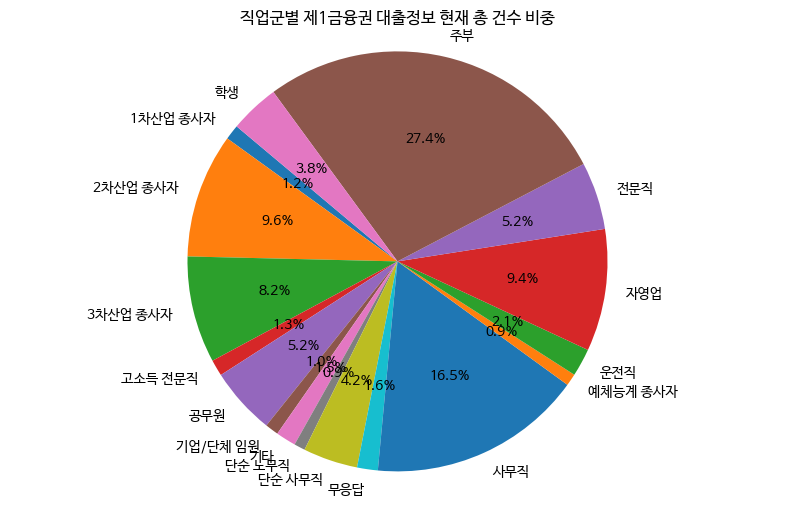

In [27]:
# 직업군별 대출 정보를 계산합니다.
loan_columns = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']
occupation_loan_data = df_merge.groupby('OCCP_NAME_G')[loan_columns].sum()

# 파이차트를 그리기 위해 데이터를 준비합니다.
# 여기서는 '대출정보 현재 총 건수[은행]'을 기준으로 파이차트를 그립니다.
plt.figure(figsize=(10, 6))
plt.pie(occupation_loan_data['BNK_LNIF_CNT'], labels=occupation_loan_data.index, autopct='%1.1f%%', startangle=140)
plt.title('직업군별 제1금융권 대출정보 현재 총 건수 비중')

# 그래프를 표시합니다.
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.show()

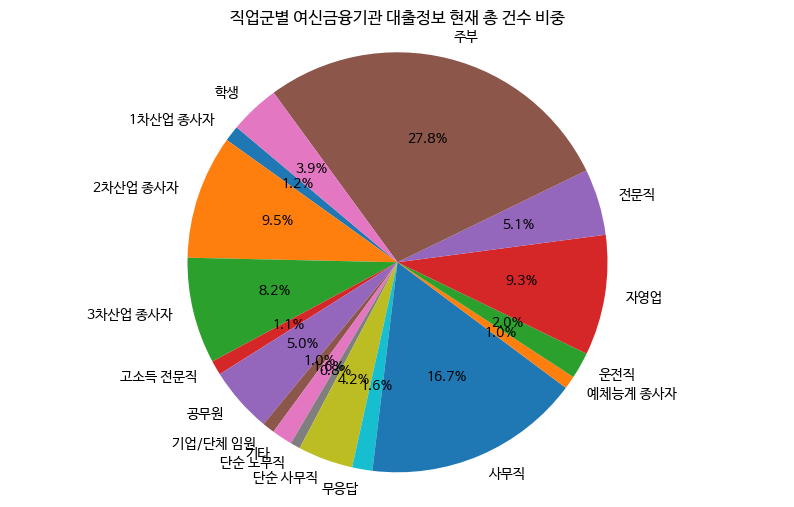

In [28]:
# 직업군별 대출 정보를 계산합니다.
loan_columns = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']
occupation_loan_data = df_merge.groupby('OCCP_NAME_G')[loan_columns].sum()

# 파이차트를 그리기 위해 데이터를 준비합니다.
# 여기서는 '대출정보 현재 총 건수[카드사/할부사/캐피탈]'을 기준으로 파이차트를 그립니다.
plt.figure(figsize=(10, 6))
plt.pie(occupation_loan_data['CPT_LNIF_CNT'], labels=occupation_loan_data.index, autopct='%1.1f%%', startangle=140)
plt.title('직업군별 여신금융기관 대출정보 현재 총 건수 비중')

# 그래프를 표시합니다.
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.show()

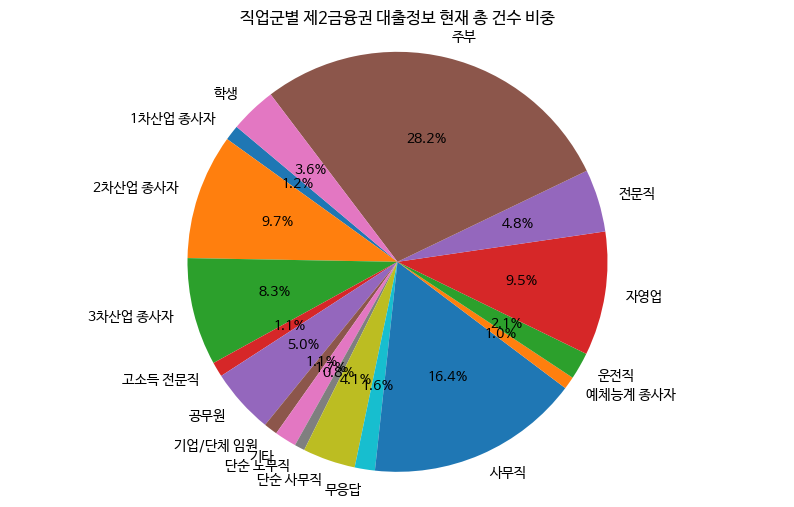

In [29]:
# 직업군별 대출 정보를 계산합니다.
loan_columns = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']
occupation_loan_data = df_merge.groupby('OCCP_NAME_G')[loan_columns].sum()

# 파이차트를 그리기 위해 데이터를 준비합니다.
# 여기서는 '대출정보 현재 총 건수[2산업분류]'을 기준으로 파이차트를 그립니다.
plt.figure(figsize=(10, 6))
plt.pie(occupation_loan_data['SPART_LNIF_CNT'], labels=occupation_loan_data.index, autopct='%1.1f%%', startangle=140)
plt.title('직업군별 제2금융권 대출정보 현재 총 건수 비중')

# 그래프를 표시합니다.
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.show()

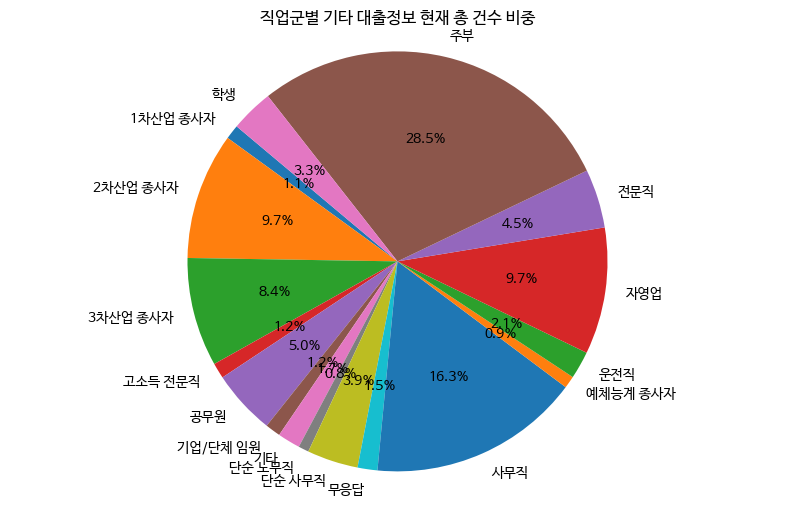

In [30]:
# 직업군별 대출 정보를 계산합니다.
loan_columns = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']
occupation_loan_data = df_merge.groupby('OCCP_NAME_G')[loan_columns].sum()

# 파이차트를 그리기 위해 데이터를 준비합니다.
# 여기서는 '대출정보 현재 총 건수[기타]'을 기준으로 파이차트를 그립니다.
plt.figure(figsize=(10, 6))
plt.pie(occupation_loan_data['ECT_LNIF_CNT'], labels=occupation_loan_data.index, autopct='%1.1f%%', startangle=140)
plt.title('직업군별 기타 대출정보 현재 총 건수 비중')

# 그래프를 표시합니다.
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.show()

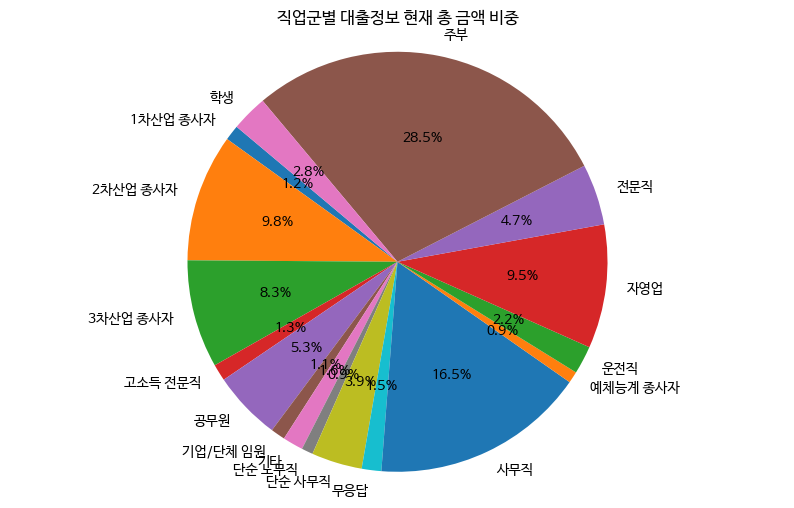

In [31]:
# 직업군별 '대출정보 현재 총 금액'정보를 계산합니다.
occupation_loan_data = df_merge.groupby('OCCP_NAME_G')['TOT_LNIF_AMT'].sum()

# 파이차트를 그리기 위해 데이터를 준비합니다.
# 여기서는 '대출정보 현재 총 금액'을 기준으로 파이차트를 그립니다.
plt.figure(figsize=(10, 6))
plt.pie(occupation_loan_data, labels=occupation_loan_data.index, autopct='%1.1f%%', startangle=140)
plt.title('직업군별 대출정보 현재 총 금액 비중')

# 그래프를 표시합니다액
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.show()

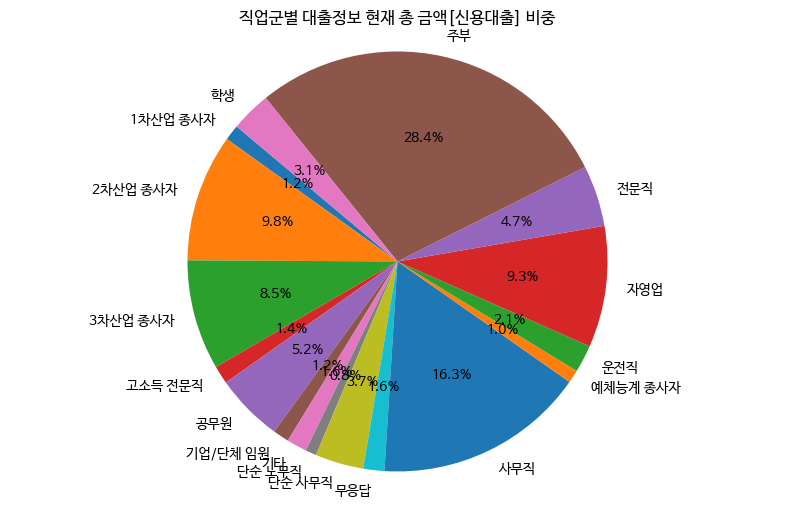

In [32]:
# 직업군별 '대출정보 현재 총 금액'정보를 계산합니다.
occupation_loan_data = df_merge.groupby('OCCP_NAME_G')['TOT_CLIF_AMT'].sum()

# 파이차트를 그리기 위해 데이터를 준비합니다.
# 여기서는 '대출정보 현재 총 금액[신용대출]'을 기준으로 파이차트를 그립니다.
plt.figure(figsize=(10, 6))
plt.pie(occupation_loan_data, labels=occupation_loan_data.index, autopct='%1.1f%%', startangle=140)
plt.title('직업군별 대출정보 현재 총 금액[신용대출] 비중')

# 그래프를 표시합니다.
plt.axis('equal')  # 파이차트를 동그랗게 만듭니다.
plt.show()

* 대출정보 현재 총 건수(은행, 카드사/할부사/캐피탈, 2산업분류, 기타), 대출정보 현재 총 금액 비중에 차이가 없음

: 데이터 수 자체가 많아서 하나로 수렴한 것으로 추정

# 해지/비해지별 데이터 상관성 분석
* 목표변수: 해지고객 = '실효해지건수>1', 비해지고객 = '실효해지건수=0'

In [33]:
# '실효해지건수'를 기반으로 '이탈고객' 변수 생성
df_merge['이탈고객'] = df_merge['CNTT_LAMT_CNT'].apply(lambda x: 1 if x >= 1 else 0)

# 결과를 출력
print(df_merge)

        CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
0             1       0             1             0               0   
1             2       0             1             0               0   
2             3       0             0             1               3   
3             4       1             0             2               4   
4             5       0             4             0               0   
...         ...     ...           ...           ...             ...   
100228   102248       0             1             0               2   
100229   102249       0             2             0               0   
100230   102250       0             1             0               0   
100231   102251       0             0             0               1   
100232   102252       0             1             0               0   

        ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
0                  0          9001          9001          9001     

In [35]:
df_merge['이탈고객'].value_counts()

0    91910
1     8323
Name: 이탈고객, dtype: int64

<연체율>
* (1) 해지고객에서의 연체율, (2) 비해지고객에서의 연체율 비교

- 연체율 설명변수: 신용대출연체율/ 30일이내신용대출연체율/ 최근1년신용대출연체율/ 보험료연체율/ 최근1년보험료연체율/ 최근1년약대연체율


1. '이탈고객(목표변수)' vs '보험료연체율' 비교

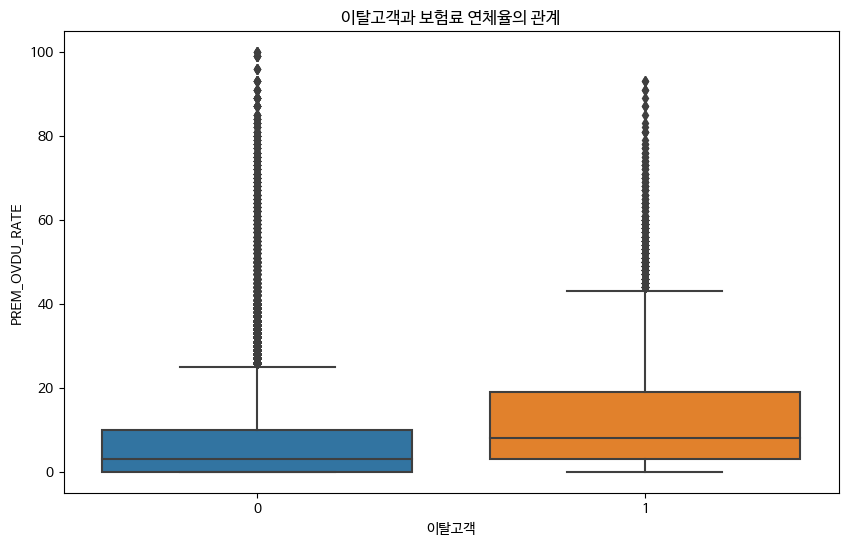

In [37]:
#1. '이탈고객'변수와 '보험료연체율' 비교. #비이탈고객=0, 이탈고객=1

# seaborn을 사용하여 boxplot그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='이탈고객', y='PREM_OVDU_RATE', data=df_merge)
plt.title('이탈고객과 보험료 연체율의 관계')
plt.show()

==> 이탈고객과 비이탈고객의 보험연체율은 평균에는 큰 차이가 나지 않음. 그러나, 관리상한(UCL)을 봤을 때, 이탈고객의 보험료 연체율 UCL이 압도적으로 높게 나왔다. UCL 수치의 차이가 크다.

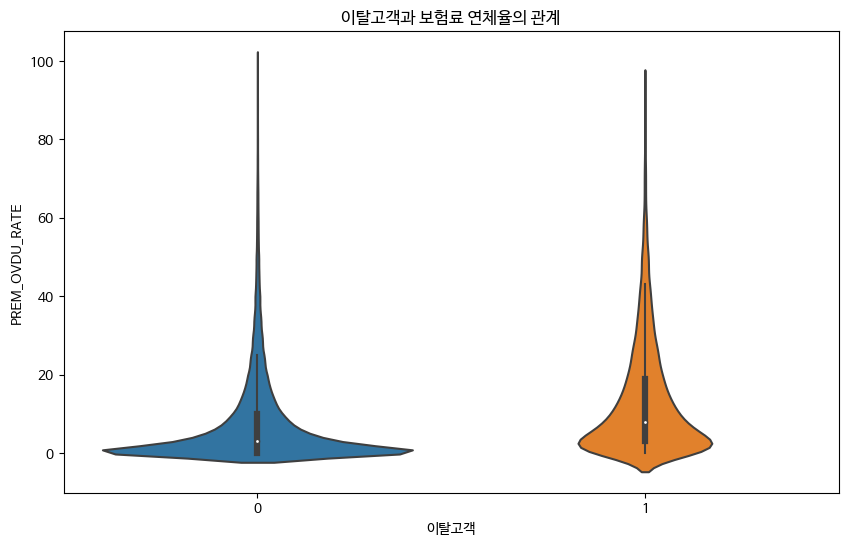

In [38]:
# seaborn을 사용하여 boxplot그리기  #비이탈고객=0, 이탈고객=1
plt.figure(figsize=(10, 6))
sns.violinplot(x='이탈고객', y='PREM_OVDU_RATE', data=df_merge)
plt.title('이탈고객과 보험료 연체율의 관계')
plt.show()

==> 정규분포도를 봤을 때, 비이탈고객의 보험료 연체율은 0에 가까운 부분에 상당히 많이 몰려있는 모습을 보임. 
이탈고객의 보험료 연체율 또한 마찬가지로 0%에 가까운 부분에 가장 많이 분포해있기는 하지만, 비이탈고객 집단과 비교해보았을 때, 상대적으로 적은 수치임. 

이탈고객 집단에 비해 보험료 연체율이 높은 사람들이 많다. y축(보험료 연체율) 아래 --> 위로 볼 때, 곡선의 흐름이 완만함. 
반면 이탈고객 집단의 곡선 흐름은 아래 --> 위로 볼 때, 매우 급격하다.

<대출건수>
* (1) 해지고객에서의 대출비율, (2) 비해지고객에서의 대출비율 비교

- 연체율 설명변수: 대출정보 현재 총 건수[은행], 대출정보 현재 총 건수[카드사/할부사/캐피탈], 대출정보 현재 총 건수[2산업분류], 대출정보 현재 총 건수[기타], 대출정보 현재 총 금액, 대출정보 현재 총 금액[신용대출], 대출정보 현재 총 금액[은행], 대출정보 현재 총 금액[카드사/할부사/캐피탈], 대출정보 최근 개설일로부터 현재까지 유지기간[신용대출], 대출정보 최근 개설일로부터 현재까지 유지기간[2산업분류-신용대출],

- 연체율 설명변수2: 신용대출건수, 최초대출날짜, XX생명신용대출금액, XX생명신용상환금액, 신용대출연체율, 30일이내신용대출연체율, 최근1년신용대출연체율, 

- 연체율 설명변수3: 평균약대율, 약관대출가능잔액, 최근1년약대금액, 최근1년약대연체율, 

1. '이탈고객(목표변수)' vs '금융기관별 대출정보 현재 총 건수[은행, 여신금융, 2금융권, 기타]' 비교

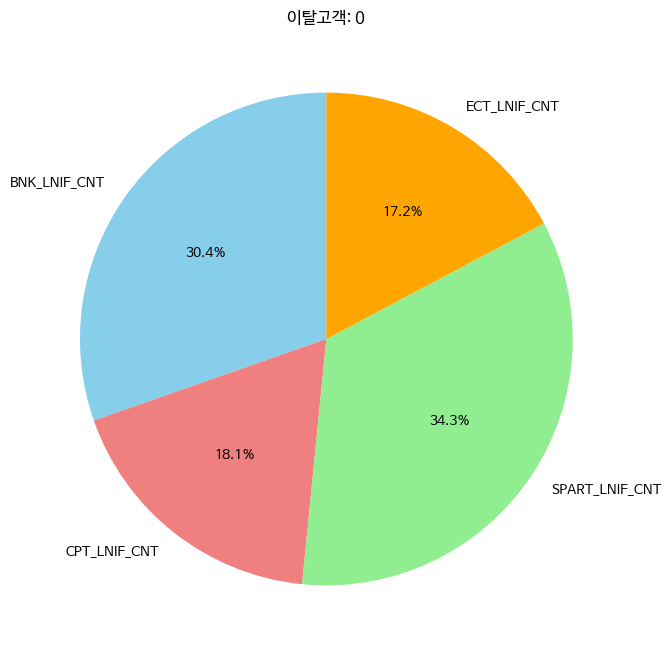

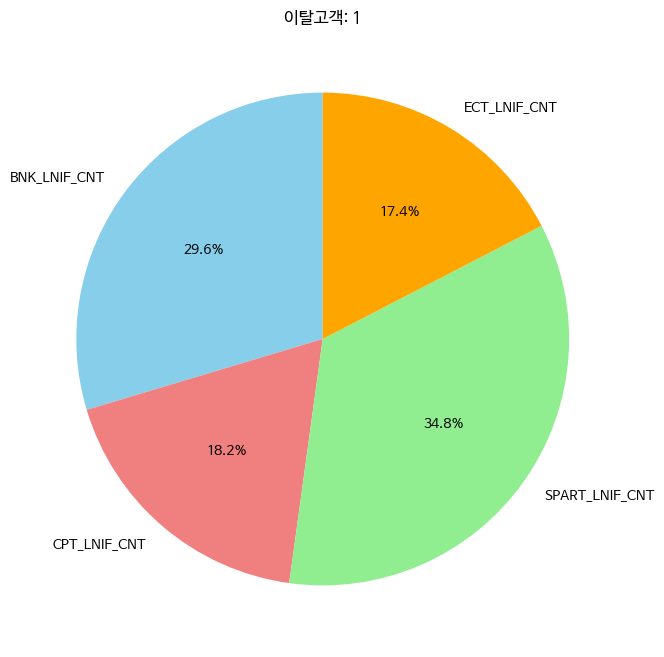

In [40]:
average_counts_by_occupation = df_merge.groupby('이탈고객')[['BNK_LNIF_CNT','CPT_LNIF_CNT','SPART_LNIF_CNT','ECT_LNIF_CNT']].mean()

# 파이 차트 그리기
for index, row in average_counts_by_occupation.iterrows():
    plt.figure(figsize=(8, 8))
    plt.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
    plt.title(f'이탈고객: {index}')
    plt.show()

==> 이탈고객과 비이탈고객의 대출 시 금융기관이용 비중에는 차이가 없음

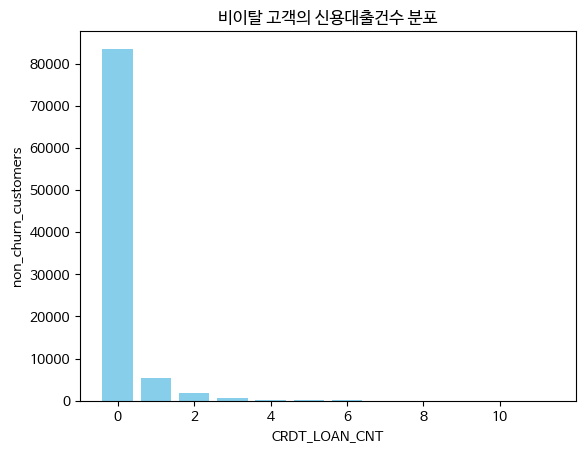

In [42]:
#'비이탈고객' vs '신용대출건수' 비교

# '이탈고객'이 0인 데이터만 선택
non_churn_customers = df_merge[df_merge['이탈고객'] == 0]

# '신용대출건수'를 범주별로 그룹화하여 합계 계산
credit_loan_counts = non_churn_customers.groupby('CRDT_LOAN_CNT').size()

# 막대 그래프 그리기
plt.bar(credit_loan_counts.index, credit_loan_counts.values, color='skyblue')
plt.xlabel('CRDT_LOAN_CNT')
plt.ylabel('non_churn_customers')
plt.title('비이탈 고객의 신용대출건수 분포')
plt.show()


==> 비이탈고객 중, 신용대출건수가 1이상인 고객들은 곧 보험계약을 해지하고 보험금을 뺄 잠재위험인자로 간주
"약관 대출은 1%에 불과. 보험해지자 중, 약관대출을 거치지 않고,다른 금융기관들에서 우선 대출을 받은 후, 생계가 힘들어지면 최후의 수단으로 보험을 해지하는 경향성이 뚜렷히 보였다.

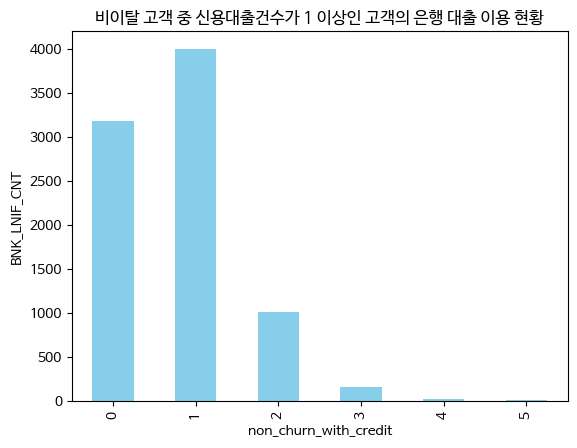

In [46]:
# '이탈고객'이 0이면서 '신용대출건수'가 1 이상인 데이터만 선택
non_churn_with_credit = df_merge[(df_merge['이탈고객'] == 0) & (df_merge['CRDT_LOAN_CNT'] >= 1)]

# '신용대출금융기관'을 범주별로 그룹화하여 합계 계산
credit_institutions_counts = non_churn_with_credit.groupby('BNK_LNIF_CNT').size()

# 막대 그래프 그리기
credit_institutions_counts.plot(kind='bar', color='skyblue')
plt.xlabel('non_churn_with_credit')
plt.ylabel('BNK_LNIF_CNT')
plt.title('비이탈 고객 중 신용대출건수가 1 이상인 고객의 은행 대출 이용 현황')
plt.show()

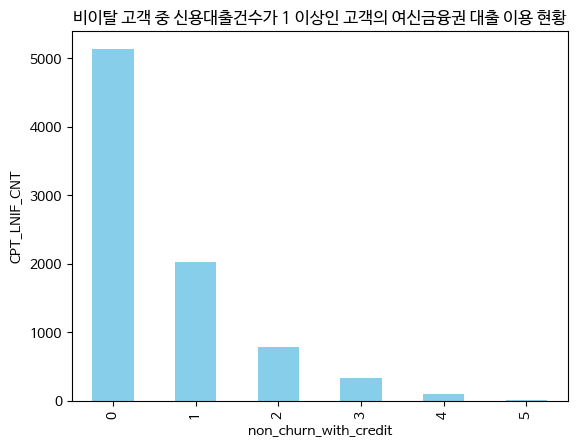

In [47]:
# '이탈고객'이 0이면서 '신용대출건수'가 1 이상인 데이터만 선택
non_churn_with_credit = df_merge[(df_merge['이탈고객'] == 0) & (df_merge['CRDT_LOAN_CNT'] >= 1)]

# '신용대출금융기관'을 범주별로 그룹화하여 합계 계산
credit_institutions_counts = non_churn_with_credit.groupby('CPT_LNIF_CNT').size()

# 막대 그래프 그리기
credit_institutions_counts.plot(kind='bar', color='skyblue')
plt.xlabel('non_churn_with_credit')
plt.ylabel('CPT_LNIF_CNT')
plt.title('비이탈 고객 중 신용대출건수가 1 이상인 고객의 여신금융권 대출 이용 현황')
plt.show()

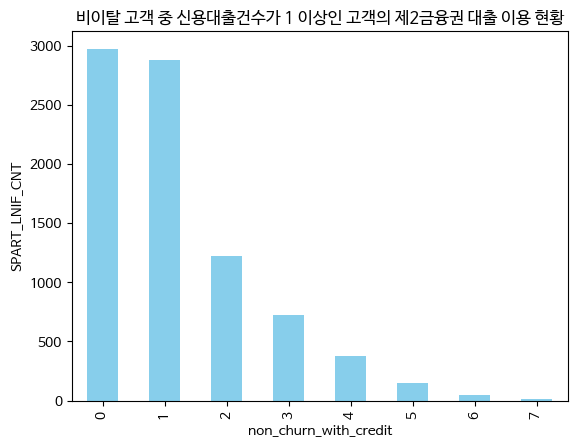

In [49]:
# '이탈고객'이 0이면서 '신용대출건수'가 1 이상인 데이터만 선택
non_churn_with_credit = df_merge[(df_merge['이탈고객'] == 0) & (df_merge['CRDT_LOAN_CNT'] >= 1)]

# '신용대출금융기관'을 범주별로 그룹화하여 합계 계산
credit_institutions_counts = non_churn_with_credit.groupby('SPART_LNIF_CNT').size()

# 막대 그래프 그리기
credit_institutions_counts.plot(kind='bar', color='skyblue')
plt.xlabel('non_churn_with_credit')
plt.ylabel('SPART_LNIF_CNT')
plt.title('비이탈 고객 중 신용대출건수가 1 이상인 고객의 제2금융권 대출 이용 현황')
plt.show()

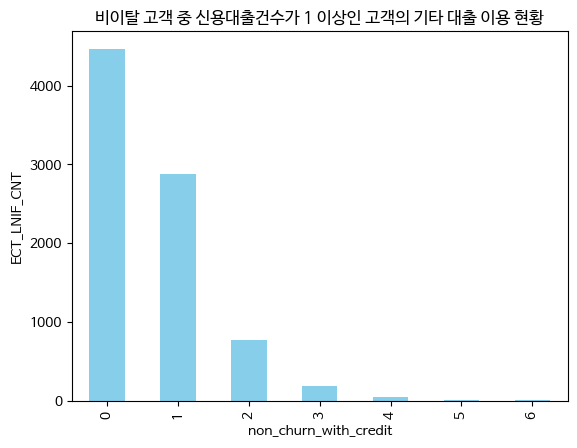

In [52]:
# '이탈고객'이 0이면서 '신용대출건수'가 1 이상인 데이터만 선택
non_churn_with_credit = df_merge[(df_merge['이탈고객'] == 0) & (df_merge['CRDT_LOAN_CNT'] >= 1)]

# '신용대출금융기관'을 범주별로 그룹화하여 합계 계산
credit_institutions_counts = non_churn_with_credit.groupby('ECT_LNIF_CNT').size()

# 막대 그래프 그리기
credit_institutions_counts.plot(kind='bar', color='skyblue')
plt.xlabel('non_churn_with_credit')
plt.ylabel('ECT_LNIF_CNT')
plt.title('비이탈 고객 중 신용대출건수가 1 이상인 고객의 기타 대출 이용 현황')
plt.show()

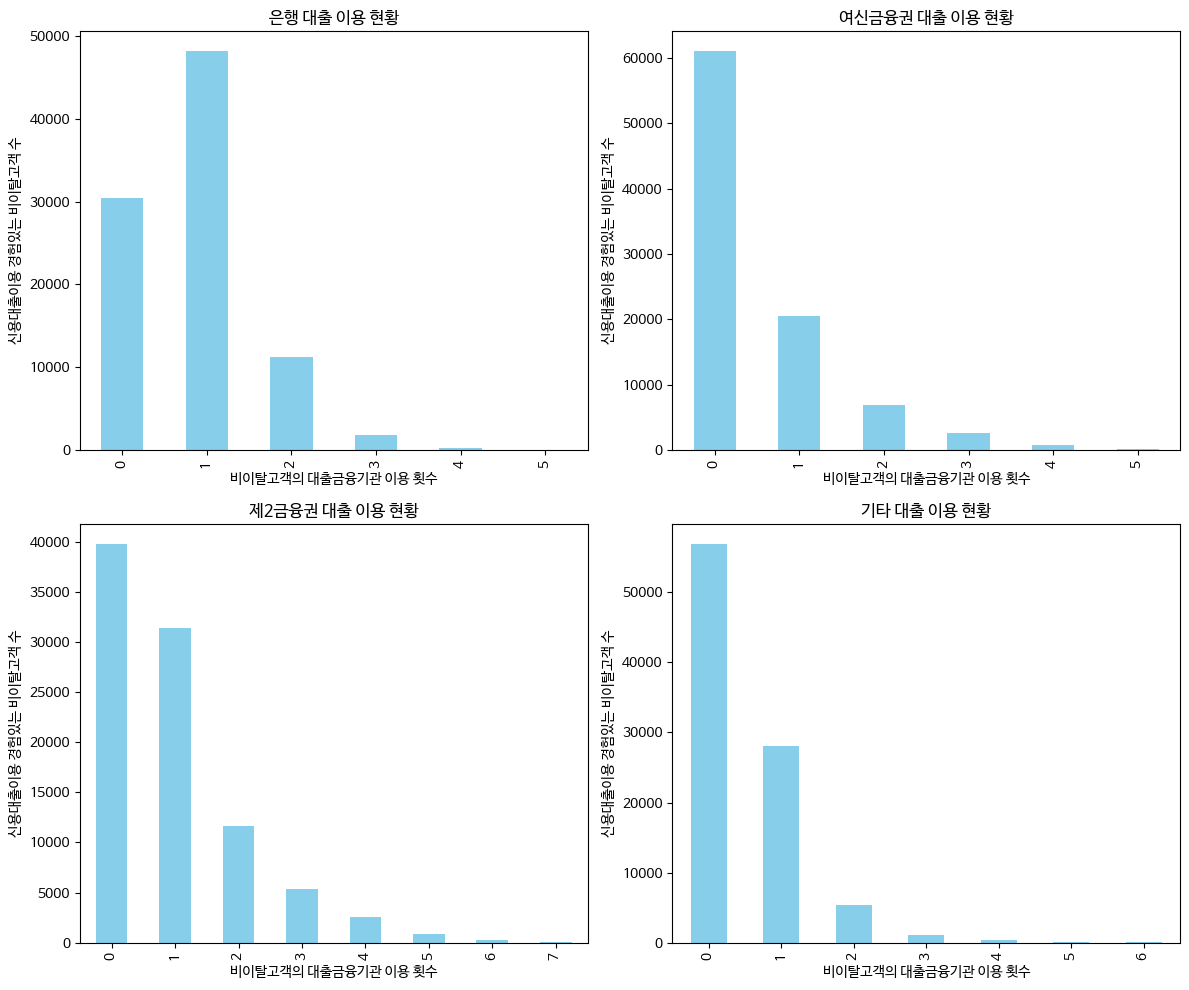

In [60]:
# '이탈고객'이 0이면서 '신용대출건수'가 1 이상인 데이터만 선택
non_churn_with_credit = df_merge[(df_merge['이탈고객'] == 0)]

# 그래프를 그릴 변수들과 그에 대한 그래프 제목들 정의
financial_vars = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']
titles = ['은행 대출 이용 현황', '여신금융권 대출 이용 현황', '제2금융권 대출 이용 현황', '기타 대출 이용 현황']

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# 각 변수에 대한 막대 그래프 그리기
for i, (var, title) in enumerate(zip(financial_vars, titles)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # '신용대출금융기관'을 범주별로 그룹화하여 합계 계산
    credit_institutions_counts = non_churn_with_credit.groupby(var).size()

    # 막대 그래프 그리기
    credit_institutions_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('비이탈고객의 대출금융기관 이용 횟수')
    ax.set_ylabel('신용대출이용 경험있는 비이탈고객 수')

plt.tight_layout()
plt.show()

* 1금융권(은행) 이용 비율이 압도적으로 높음. 
* 약관대출 모르는 사람이 처음 대출 받을 때 가장 많이 이용하는 기관: 은행(1금융권) > 2금융권 > 기타 > 여신금융권(카드사/할부사/캐피탈)
* 약관대출 모르는 사람이 두 번째로 대출 받을 때 가장 많이 이용하는 기관: 2금융권 > 은행(1금융권) > 여신금융권(카드/할부사/캐피탈) > 기타
* 약관대출 모르는 사람이 세 번째로 대출 받을 때 가장 많이 이용하는 기관: 2금융권 > 여신금융타(카드/할부사/캐피탈) ~ 은행(1금융권) > 기타

==> 전반적으로... '비이탈고객의 대출금융기관 이용 횟수'가 증가할수록, y축. '비이탈고객수' 자체는 점차, 급격히 감소하는 경향을 보임.

이는 XX생명회사의 '약관대출'이 아니라, 생계유지를 위해 타금융기관에서 대출을 지속. --> 최후의 수단으로 보험해지를 통해 보험료를 빼내어 쓴 것으로 확인.

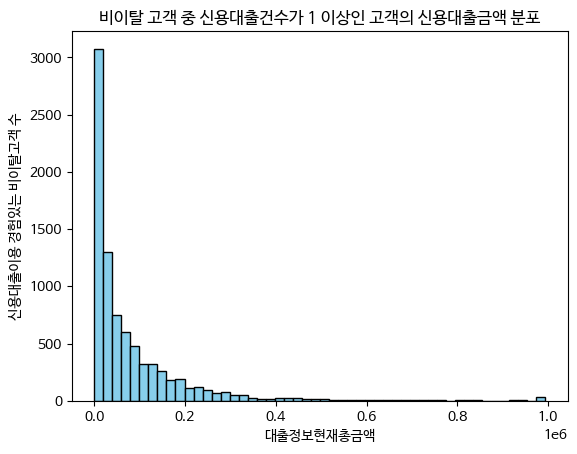

In [72]:
# '비이탈고객'의 대출정보현재총금액(TOT_LNIF_AMT)' 분포 보기

# '이탈고객'이 0이면서 '신용대출건수'가 1 이상인 데이터만 선택
non_churn_with_credit = df_merge[(df_merge['이탈고객'] == 0) & (df_merge['CRDT_LOAN_CNT'] >= 1)]

# 히스토그램 그리기
plt.hist(non_churn_with_credit['TOT_LNIF_AMT'], bins=50, color='skyblue', edgecolor='black') 
    #대출정보현재총금액을 0.0부터 1.0까지 50으로, 동일 범위로 나눔
plt.xlabel('대출정보현재총금액')
plt.ylabel('신용대출이용 경험있는 비이탈고객 수')
plt.title('비이탈 고객 중 신용대출건수가 1 이상인 고객의 신용대출금액 분포')
plt.show()

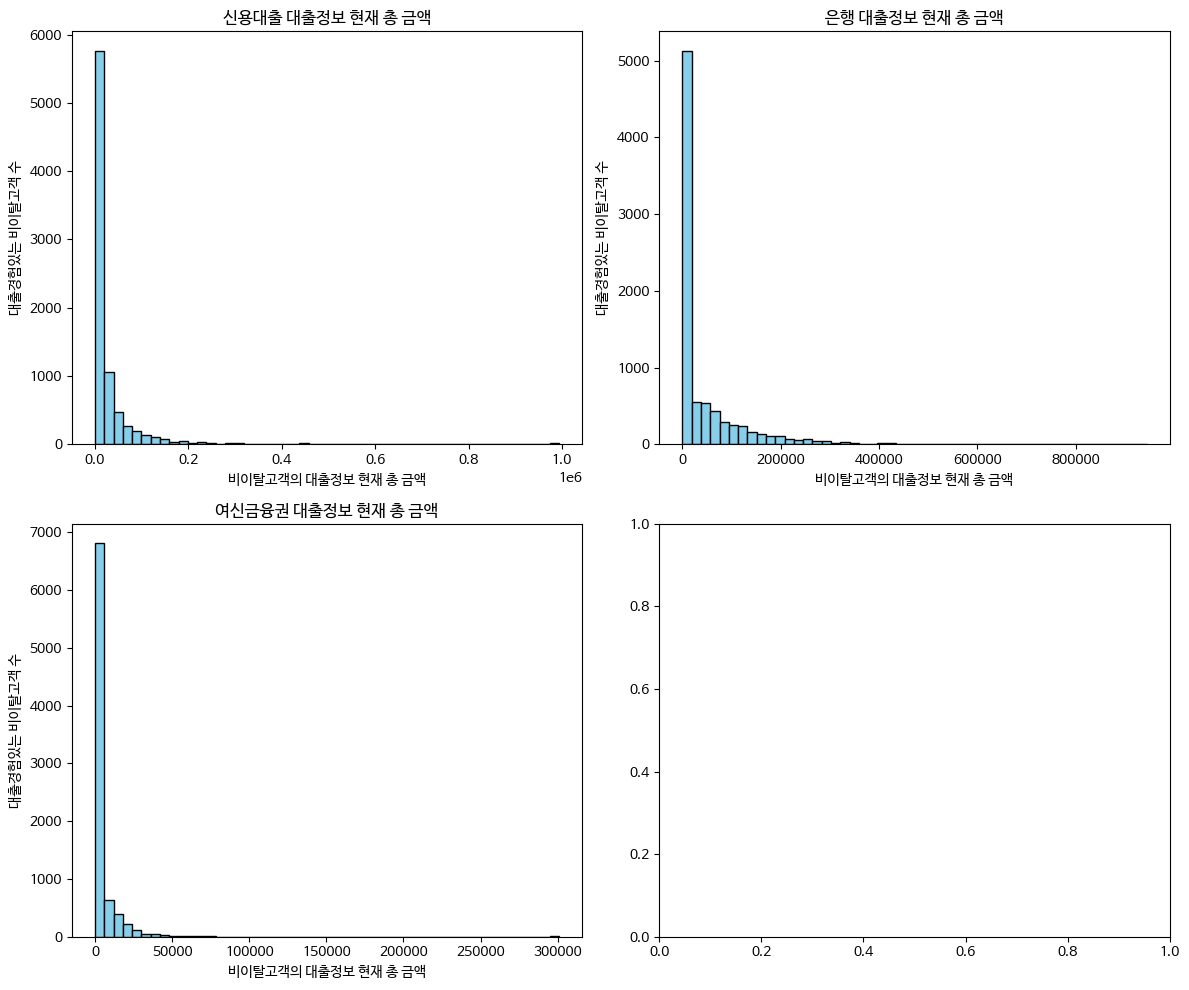

In [77]:
# '이탈고객'이 0이면서 '신용대출건수'가 1 이상인 데이터(고객)만 선택
non_churn_with_credit = df_merge[(df_merge['이탈고객'] == 0)& (df_merge['CRDT_LOAN_CNT'] >= 1)]

# 그래프를 그릴 변수들과 그에 대한 그래프 제목들 정의 #대출정보 현재 총 금액.ver
financial_vars = ['TOT_CLIF_AMT', 'BNK_LNIF_AMT', 'CPT_LNIF_AMT']
titles = ['신용대출 대출정보 현재 총 금액', '은행 대출정보 현재 총 금액', '여신금융권 대출정보 현재 총 금액']

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# 각 변수에 대한 막대 그래프 그리기
for i, (var, title) in enumerate(zip(financial_vars, titles)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # 히스토그램 그리기
    ax.hist(non_churn_with_credit[var], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('비이탈고객의 대출정보 현재 총 금액')
    ax.set_ylabel('대출경험있는 비이탈고객 수')

plt.tight_layout()
plt.show()

==> 확실히 은행(제1금융권)에서 많은 돈을 빌리는 것으로 드러남.

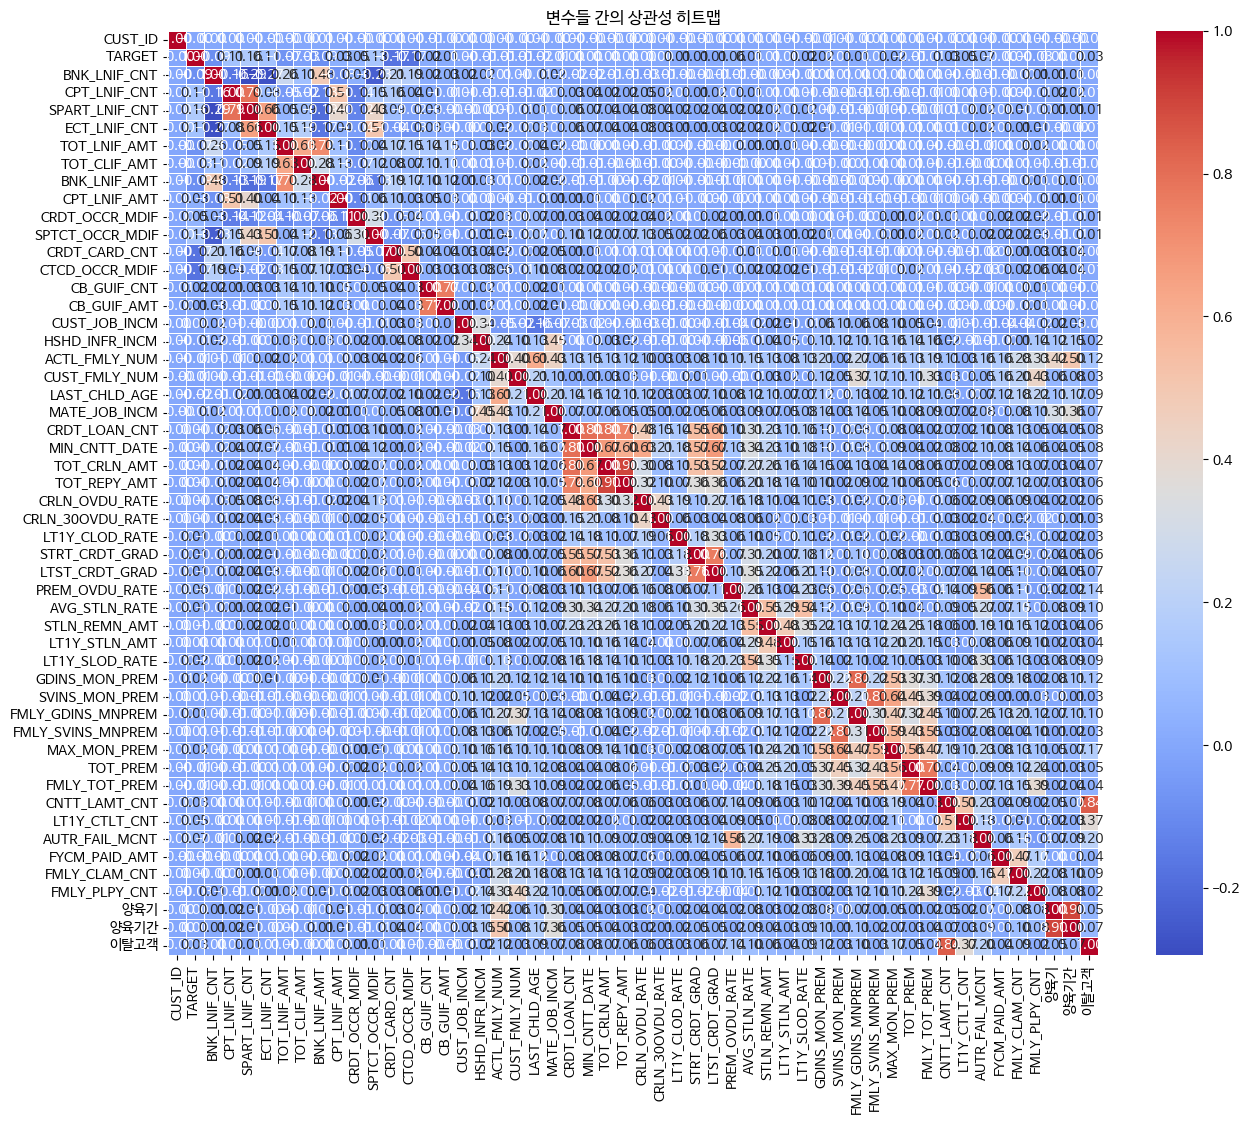

In [78]:
# 변수들 간의 상관 행렬 계산
correlation_matrix = df_merge.corr()

# 상관 히트맵 그리기
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('변수들 간의 상관성 히트맵')
plt.show()

* '갚을금액' 파생변수 생성 ==> 이탈자들 중에서 갚을금액이 있는 사람들 보기

: 자발적으로 해약한건지, 보험사에서 일방적으로 해지해서 실효된건지 알 수 있을 것

In [80]:
# '갚을 금액' 파생변수 생성
df_merge['갚을 금액'] = df_merge['TOT_CRLN_AMT'] - df_merge['TOT_REPY_AMT']

# 결과 확인
print(df_merge[['TOT_CRLN_AMT', 'TOT_REPY_AMT', '갚을 금액']])

        TOT_CRLN_AMT  TOT_REPY_AMT  갚을 금액
0                  0             0      0
1                  0             0      0
2                  0             0      0
3                  0             0      0
4                  0             0      0
...              ...           ...    ...
100228             0             0      0
100229             0             0      0
100230             0             0      0
100231             0             0      0
100232             0             0      0

[100233 rows x 3 columns]


In [82]:
# '갚을 금액'이 0이 아닌 행들만 선택
non_zero_repayment = df_merge[df_merge['갚을 금액'] != 0]

# 선택된 결과 보기
print(non_zero_repayment)

       CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
64          65       0             1             0               0   
75          76       1             0             1               2   
77          78       0             0             1               1   
80          81       0             0             1               1   
135        137       0             2             0               0   
...        ...     ...           ...           ...             ...   
99873   101885       0             0             0               1   
99888   101901       0             1             0               0   
99890   101903       0             0             0               0   
99926   101940       0             0             2               4   
99970   101985       0             2             0               0   

       ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
64                0          3001          3001          3001             0   
7

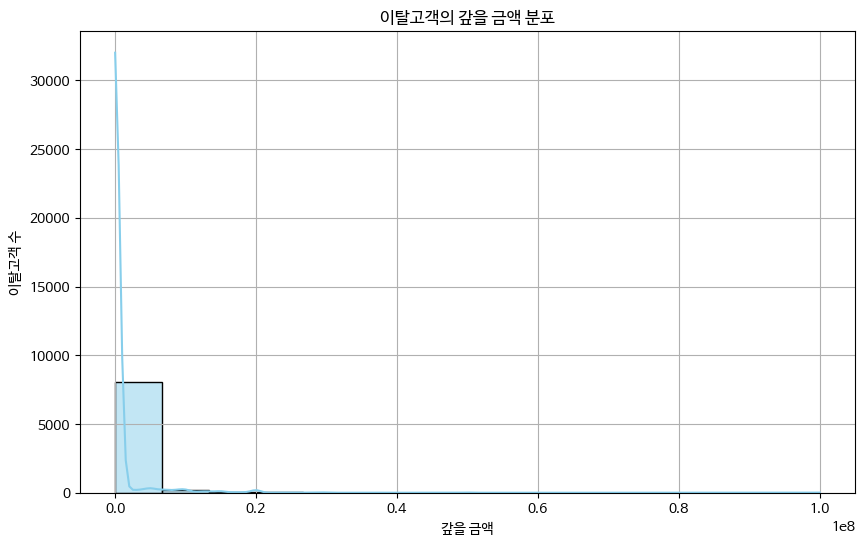

In [85]:
#'이탈고객'의 '갚을금액' 분포 비교 그래프

# '이탈고객'이 1인 행들만 선택
churned_customers = df_merge[df_merge['이탈고객'] == 1]

# '갚을 금액' 분포를 보여주는 히스토그램 또는 커널 밀도 추정 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['갚을 금액'], kde=True, color='skyblue')
plt.xlabel('갚을 금액')
plt.ylabel('이탈고객 수')
plt.title('이탈고객의 갚을 금액 분포')
plt.grid(True)
plt.show()

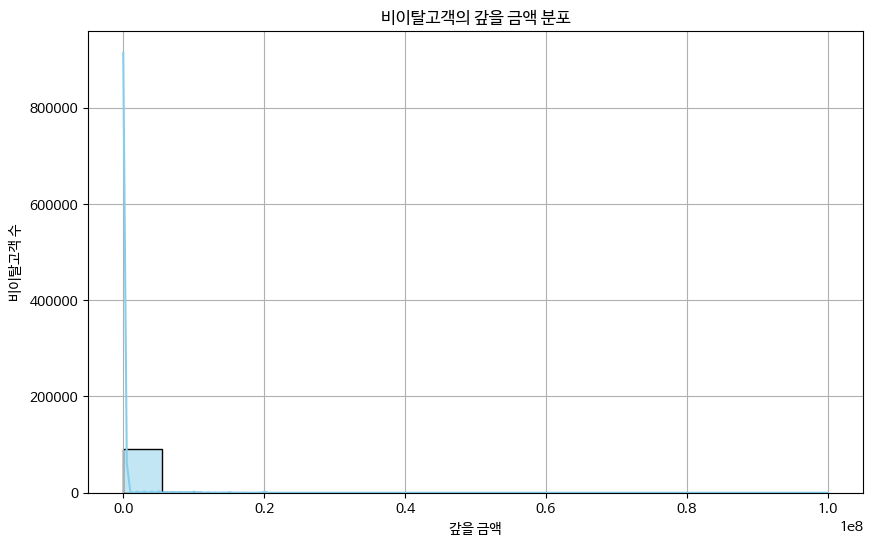

In [86]:
#'비이탈고객'의 '갚을금액' 분포 비교 그래프

# '이탈고객'이 0인 행들만 선택
churned_customers = df_merge[df_merge['이탈고객'] == 0]

# '갚을 금액' 분포를 보여주는 히스토그램 또는 커널 밀도 추정 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['갚을 금액'], kde=True, color='skyblue')
plt.xlabel('갚을 금액')
plt.ylabel('비이탈고객 수')
plt.title('비이탈고객의 갚을 금액 분포')
plt.grid(True)
plt.show()

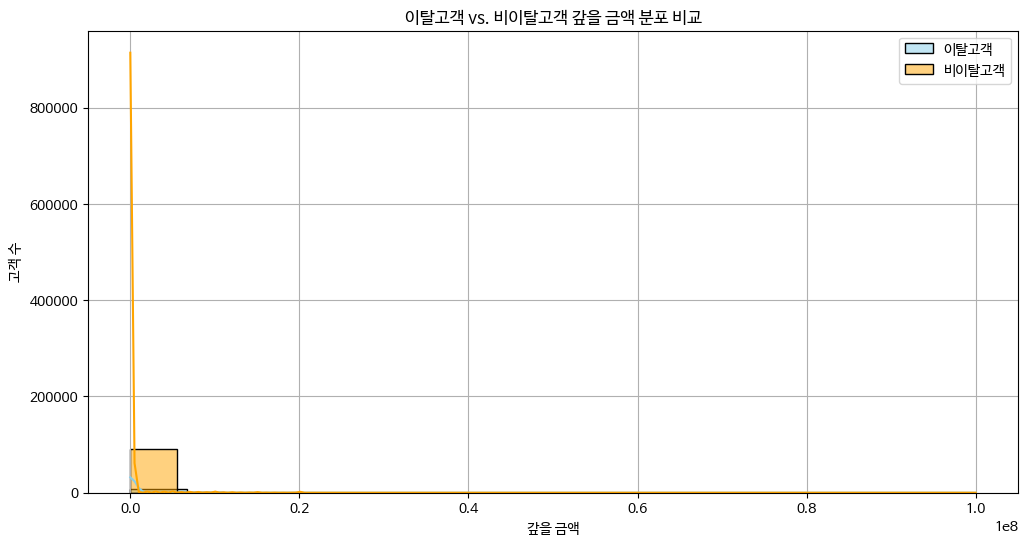

In [95]:
# '이탈고객'이 1인 행들만 선택
churned_customers = df_merge[df_merge['이탈고객'] == 1]

# '이탈고객'이 0인 행들만 선택
non_churned_customers = df_merge[df_merge['이탈고객'] == 0]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 이탈고객의 갚을 금액 분포
sns.histplot(churned_customers['갚을 금액'], kde=True, color='skyblue', label='이탈고객')

# 비이탈고객의 갚을 금액 분포
sns.histplot(non_churned_customers['갚을 금액'], kde=True, color='orange', label='비이탈고객')

# 축 및 제목 설정
plt.xlabel('갚을 금액')
plt.ylabel('고객 수')
plt.title('이탈고객 vs. 비이탈고객 갚을 금액 분포 비교')

# 범례 표시
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

<신용등급>
1. 신용등급 변동 여부: 신규 고객의 경우, 최초 신용등급과 최근 신용등급에 차이가 있을 수 있음. 

In [97]:
# 최초신용등급과 최근신용등급이 다른 경우 1, 같은 경우 0
#df_merge['신용등급_변동'] = (df_merge['최초신용등급'] != df_merge['최근신용등급']).astype(int)

df_merge['신용등급_변동'] = (df_merge['STRT_CRDT_GRAD'] != df_merge['LTST_CRDT_GRAD']).astype(int)
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,이탈고객,갚을 금액,신용등급_변동
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,0,50,1,0,6.0,0,0,0
1,2,0,1,0,0,0,24001,0,24001,0,...,300000,2,5,50,1,0,1.0,0,0,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,2,60,2,0,0.0,0,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,1,35,1,0,0.0,0,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,500000,2,1,45,1,1,16.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,700000,0,3,55,2,0,0.0,0,0,0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,100000,0,3,45,2,1,11.0,0,0,0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,0,4,45,1,1,16.0,0,0,0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,45,1,0,0.0,0,0,0


2. 신용등급_차이: 최초 신용등급과 최근 신용등급의 차이를 나타내는 파생변수

In [99]:
df_merge['신용등급_차이'] = df_merge['LTST_CRDT_GRAD'] - df_merge['STRT_CRDT_GRAD']
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,이탈고객,갚을 금액,신용등급_변동,신용등급_차이
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,50,1,0,6.0,0,0,0,0
1,2,0,1,0,0,0,24001,0,24001,0,...,2,5,50,1,0,1.0,0,0,0,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,2,60,2,0,0.0,0,0,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,1,35,1,0,0.0,0,0,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,2,1,45,1,1,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,0,3,55,2,0,0.0,0,0,0,0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,3,45,2,1,11.0,0,0,0,0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,4,45,1,1,16.0,0,0,0,0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,45,1,0,0.0,0,0,0,0


* 신용등급 상관성 분석

In [101]:
#'신용등급_변동'과 '이탈고객' 간의 상관성
correlation_1 = df_merge[['신용등급_변동', '이탈고객']].corr().iloc[0, 1]
print(f"신용등급 변동과 이탈고객 간의 상관계수: {correlation_1}")

신용등급 변동과 이탈고객 간의 상관계수: 0.06190713280495688


==> 0.6~0.8: 강한 양의 선형관계를 갖는다. '신규고객' 상태와 '이탈고객'은 강한 양의 선형관계를 갖는다. 

        ==> (비례: 신규고객이 증가할수록 이탈고객도 증가하는 경향성이 강함.)

In [102]:
#'신용등급_차이'와 '이탈고객' 간의 상관성
correlation_2 = df_merge[['신용등급_차이', '이탈고객']].corr().iloc[0, 1]
print(f"신용등급 차이와 이탈고객 간의 상관계수: {correlation_2}")

신용등급 차이와 이탈고객 간의 상관계수: 0.05266180492366759


==> 0.4~0.6: 중간 정도의 양의 선형관계를 갖는다. '신용등급의 증감'과 '이탈고객'은 중간 정도의 양의 상관관계를 갖는다.

        ==> (비례: 신용등급의 증감과 고객이탈은 관련성이 크다. 신용등급이 증가할수록 고객이탈이 증가하고, 신용등급이 감소할수록 고객이탈은 감소한다.)

In [104]:
df_merge['신용등급_차이'].unique()

array([ 0,  2,  1, -1,  9,  3,  5,  8,  4,  7,  6, 10, -2, -3, -4])

In [105]:
df_merge['신용등급_차이'].describe()

count    100233.000000
mean          0.143925
std           0.874770
min          -4.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: 신용등급_차이, dtype: float64

In [106]:
df_merge['OCCP_NAME_G'].unique()

array(['공무원', '자영업', '주부', '학생', '3차산업 종사자', '기업/단체 임원', '단순 사무직', '사무직',
       '단순 노무직', '무응답', '고소득 전문직', '2차산업 종사자', '운전직', '전문직', '기타',
       '예체능계 종사자', '1차산업 종사자'], dtype=object)

In [110]:
# '막내나이' 컬럼을 기반으로 '막내나이_분류' 생성
# 1이상~30세 이하인 경우에는 1, 그 외의 경우에는 0
df_merge['막내나이_분류'] = df_merge['LAST_CHLD_AGE'].apply(lambda x: 1 if (x >= 1) and (x <= 30) else 0)
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,이탈고객,갚을 금액,신용등급_변동,신용등급_차이,막내나이_분류
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,50,1,0,6.0,0,0,0,0,1
1,2,0,1,0,0,0,24001,0,24001,0,...,5,50,1,0,1.0,0,0,0,0,1
2,3,0,0,1,3,2,15001,9001,0,3001,...,2,60,2,0,0.0,0,0,0,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,1,35,1,0,0.0,0,0,0,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,1,45,1,1,16.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,3,55,2,0,0.0,0,0,0,0,0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,3,45,2,1,11.0,0,0,0,0,1
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,4,45,1,1,16.0,0,0,0,0,1
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,45,1,0,0.0,0,0,0,0,0


In [115]:
# 특정 열 이름
column_name = 'OCCP_NAME_G'

# 해당 열 추출
occupation_column = df_merge[column_name]


def classify_occupation(occupation):
    if occupation in ['기업/단체 임원', '고소득 전문직', '전문직']:
        return '전문직 및 고소득 직종'
    elif occupation in ['단순 사무직', '사무직', '운전직']:
        return '서비스 및 사무직'
    elif occupation in ['자영업', '예체능계 종사자']:
        return '자영업 및 종업원'
    else:
        return '비경제 활동/기타'

# 'OCCP_NAME_G' 컬럼을 바탕으로 새로운 '직업재분류' 컬럼 생성
df_merge['직업재분류'] = df_merge['OCCP_NAME_G'].apply(classify_occupation)

# 새로운 분류를 저장할 컬럼 추가
df_merge['직업재분류'] = occupation_column.apply(classify_occupation)

# 결과 확인
print(df_merge[['OCCP_NAME_G', '직업재분류']])

       OCCP_NAME_G      직업재분류
0              공무원  비경제 활동/기타
1              자영업  자영업 및 종업원
2               주부  비경제 활동/기타
3               학생  비경제 활동/기타
4              공무원  비경제 활동/기타
...            ...        ...
100228         자영업  자영업 및 종업원
100229         운전직  서비스 및 사무직
100230         자영업  자영업 및 종업원
100231         사무직  서비스 및 사무직
100232         사무직  서비스 및 사무직

[100233 rows x 2 columns]


In [118]:
df_merge['직업재분류'].value_counts()

비경제 활동/기타       59691
서비스 및 사무직       22814
자영업 및 종업원       10421
전문직 및 고소득 직종     7307
Name: 직업재분류, dtype: int64

In [120]:
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AGE,SEX,양육기,양육기간,이탈고객,갚을 금액,신용등급_변동,신용등급_차이,막내나이_분류,직업재분류
0,1,0,1,0,0,0,9001,9001,9001,0,...,50,1,0,6.0,0,0,0,0,1,비경제 활동/기타
1,2,0,1,0,0,0,24001,0,24001,0,...,50,1,0,1.0,0,0,0,0,1,자영업 및 종업원
2,3,0,0,1,3,2,15001,9001,0,3001,...,60,2,0,0.0,0,0,0,0,0,비경제 활동/기타
3,4,1,0,2,4,2,6001,3001,0,3001,...,35,1,0,0.0,0,0,0,0,0,비경제 활동/기타
4,5,0,4,0,0,0,21001,15001,21001,0,...,45,1,1,16.0,0,0,0,0,1,비경제 활동/기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,55,2,0,0.0,0,0,0,0,0,자영업 및 종업원
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,45,2,1,11.0,0,0,0,0,1,서비스 및 사무직
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,45,1,1,16.0,0,0,0,0,1,자영업 및 종업원
100231,102251,0,0,0,1,1,57001,0,0,0,...,45,1,0,0.0,0,0,0,0,0,서비스 및 사무직
